In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [35]:
df = pd.read_csv('customer_segmentation_data.csv')

In [36]:
df.head(15)

,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
0,84966,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,70541,policy5,04-10-2018,Phone,policy2,366603,2749,Group,Email,In-Person Meeting,Afternoon,English,Segment5
1,95568,26,Male,Widowed,Doctorate,Goa,Manager,54168,policy5,11-06-2018,Chat,policy1,780236,1966,Group,Mail,In-Person Meeting,Morning,French,Segment5
2,10544,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,73899,policy5,06-05-2021,Email,policy3,773926,4413,Group,Email,Mail,Evening,German,Segment3
3,77033,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,63381,policy5,09-02-2018,Chat,policy2,787815,4342,Family,Text,In-Person Meeting,Anytime,French,Segment3
4,88160,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,38794,policy1,09-10-2018,Chat,policy4,366506,1276,Family,Email,Text,Weekends,English,Segment2
5,60937,41,Female,Separated,Master's Degree,Uttar Pradesh,Nurse,87188,policy5,9/19/2020,Chat,policy1,570757,1106,Individual,Text,Text,Afternoon,English,Segment4
6,37676,55,Male,Single,Bachelor's Degree,Rajasthan,Manager,94891,policy3,07-04-2021,Chat,policy2,604069,3661,Group,In-Person Meeting,Text,Weekends,Mandarin,Segment5
7,54100,35,Male,Married,Master's Degree,Himachal Pradesh,Artist,61003,policy1,11-01-2021,Phone,policy3,418997,1148,Business,Email,Phone,Morning,English,Segment5
8,30476,43,Female,Single,Doctorate,Manipur,Salesperson,116249,policy1,9/20/2020,Mobile App,policy4,319423,2612,Business,In-Person Meeting,Text,Weekends,Mandarin,Segment2
9,39071,32,Female,Single,Master's Degree,Gujarat,Artist,49083,policy3,4/24/2020,Phone,policy1,701577,4595,Group,Phone,Email,Weekends,English,Segment2


In [39]:
x = df[['Income Level', 'Coverage Amount']]
x

,Income Level,Coverage Amount
0,70541,366603
1,54168,780236
2,73899,773926
3,63381,787815
4,38794,366506
...,...,...
53498,120850,586401
53499,122309,637733
53500,49258,631057
53501,66301,730385


In [38]:
wcss = []

In [40]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [41]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(x_scaled)
df['Cluster'] = clusters


C:\Users\BD\AppData\Local\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\BD\AppData\Local\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\BD\AppData\Local\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\BD\AppData\Local\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fd

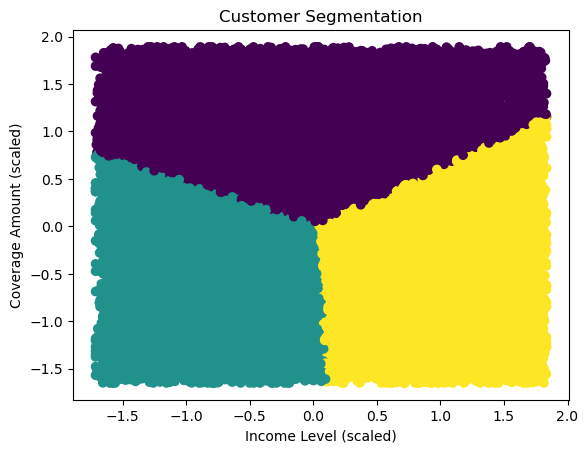

In [46]:
plt.scatter(
    x_scaled[:, 0],
    x_scaled[:, 1],
    c=clusters
)
plt.xlabel("Income Level (scaled)")
plt.ylabel("Coverage Amount (scaled)")
plt.title("Customer Segmentation")
plt.show()
